# Bernoulli Mixture EM

This file utilises an EM algorithm to the infamous MNIST dataset to perform clustering.
A few lines below show the theory behind this particular task.
Up until a certain moment I won't be using a particular function to depict a mixture, so that the theoretical results are more or less general. Later on I'll note where I should succumb to using Bernoulli distribution for this case.

Let the mixture comprise of $K$ distributions $\varphi(x_i, \theta_k)$, where $x_i, \theta_k$ are the input data and a distribution parameters respectively. The total number of training data is $L$. In the mixture, each of the distributions has a weight $\omega_k$, thus the whole model is merely a weighted sum of all the densities.

Now we shall use Maximum Likelihood Estimation (MLE) to get the optimal parameters:
$$
L = \prod_{i=1}^{L} \sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)
$$
Taking the logarithm of both sides, one obtains:
$$
l = \sum_{i=1}^{L} \log{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)}
$$

Here's where we get the problem: usually we wouldn't have the summation under the log sign, but now we do. To overcome this obstacle, we would have to invent _latent variables_. But we haven't incorporated the fact that the weights of the distributions should sum to unity. This leads us to conditional optimisation where we shall make use of the Lagrange multipliers. 

The Lagrange function takes the form:
$$
\mathcal{L} = \sum_{i=1}^{L} \log{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} - \lambda\left(\sum_{k=1}^{K}\omega_k - 1\right) \tag{1}
$$
---
#### Parameter optimisation:

**Calculating the derivative of the Lagrange function w.r.t. $\omega_j$ and setting it equal to zero:**
$$
\frac{\partial \mathcal{L}}{\partial \omega_j} = \sum_{i=1}^{L} \frac{\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} - \lambda = 0
$$

Now, rearranging the terms of the equation and multiplying both sides by $\omega_j$ yields:
$$
\sum_{i=1}^{L} \frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} = \lambda \omega_j \tag{2}
$$

Notice that the indices $j$ on the LHS are independent of summation over $i$. Thus, we could sum both sides over $j$ and change the order of summation on the left to first sum over $j$ and then over $i$, i.e., we'd take:
$$
\sum_{j=1}^{K} \sum_{i=1}^{L} \frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} = \lambda \sum_{j=1}^{K} \omega_j
$$ 
and change it to:

$$
\sum_{i=1}^{L} \frac{\sum_{j=1}^{K} \omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} = \lambda \sum_{j=1}^{K} \omega_j
$$

It is only left to notice that the numerator and denominator on the LHS are the same, which results in summing unity $L$ times. The sum on the right also gives one since it should satisfy the weight constraint. Finally, we get:
$$
L = \lambda
$$

Now we should get back to the equation $(2)$. Deriving $\omega_j$ results in:
$$
\omega_j = \frac{1}{L}\sum_{i=1}^{L} \frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)}
$$

Now we set the fraction under the sum to be the _latent variable_ $g_{ji}$ and proceed to understanding what this value represents. Notice that the equation 
$$
g_{ji}=\frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} \tag{3}
$$ 
looks very similar to the **Bayesian rule**: 
$$
\mathbb{p}(j|x_i)=\frac{\mathbb{p}(j)\mathbb{p}(x_i|j)}{\sum_{k=1}^{K} \mathbb{p}(k)\mathbb{p}(x_i|k)}
$$

This is how we're going to interpret all the input variables. $\mathbb{p}(j)=\omega_j$ is a prior distribution of mixtures or, equivalently, clusters. $\mathbb{p}(x_i|j)=\varphi(x_i, \theta_j)$ is likelyhood of $x_i$ to belong to the $j$-th cluster of the mixture. Finally, $\mathbb{p}(j|x_i) = g_{ji}$ is a (posterior) probability of ending up in $j$-th cluster after having observed the data $x_i$.

Now it comes to our understanding that 
$$\omega_j = \frac{1}{L}\sum_{i=1}^{L} \frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} = \frac{1}{L}\sum_{i=1}^{L} g_{ji}\tag{4}
$$
is nothing but the average probability of all observations to belong to the cluster $j$.
___
#### What is crucial to understand about latent variables is that once calculated, they are fixed. It is just our approximate _expectation_ of what latent variables should evaluate to.
___
**Calculating the derivative of the Lagrange function w.r.t. $\theta_j$ and setting it equal to zero:**
$$
\frac{\partial \mathcal{L}}{\partial \theta_j} = \sum_{i=1}^{L} \frac{\omega_j}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)}\frac{\partial \varphi(x_i, \theta_j)}{\partial \theta_j} = 0
$$

Notice that the first factor under the sum is almost $g_{ji}$. Let us multiply and divice the factor by $\varphi(x_i, \theta_j)$ to complete the $g_{ji}$ definition. This should take us to:
$$
\sum_{i=1}^{L} \frac{\omega_j \varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)}\frac{1}{\varphi(x_i, \theta_j)}\frac{\partial \varphi(x_i, \theta_j)}{\partial \theta_j} = \sum_{i=1}^{L} g_{ji} \frac{1}{\varphi(x_i, \theta_j)}\frac{\partial \varphi(x_i, \theta_j)}{\partial \theta_j} = 0
$$

The final notice is that what's left under the sum, other than $g_{ji}$, is the log-derivative of $\varphi$. Hence:
$$
\sum_{i=1}^{L} g_{ji} \frac{\partial \log{\varphi(x_i, \theta_j)}}{\partial \theta_j} = 0
$$
or, equivalently, making use of the fact that latent variables have been calculated and are fixed, we can take the derivative out of the sum:
$$
\frac{\partial}{\partial \theta_j} \sum_{i=1}^{L} g_{ji}  \log{\varphi(x_i, \theta_j)} = 0 \tag{5}
$$
___
#### This is how, when having approximated the latent variables (posterior probabilities), one _maximises_ the mixture distribution over data.
___
> **It has become clear what we shall do now. The EM algorithm:** 
> 1. Initialise $K$ weights and the parameters $\theta_k$ of the distribution;
> 2. Evaluate the latent variables $g_{ji}$ according to (3);
> 3. Update $\theta$'s by solving (5);
> 4. Update weights $\omega$, using (4).
> 5. Iterate until convergence.

## Deriving EM for Bernoulli Mixture:
#### Understanding the problem:
We would like to clusterise images based on the binary input of pixel intensities. Thus, each input is an array of size $(l \times w)$ = $D$, where $l$ and $w$ are length and width of an image. Assuming that all pixels are independently drawn from corresponding distribution, we might use the following Bernoulli likelyhood of $i$-th input to belong to cluster $j$:
$$
\mathbb{p}(x_i|j)=\varphi(x_i, j)=\prod_{d=1}^{D}\theta_{jd}^{x_{id}}{(1-\theta_{jd})}^{1-x_{id}}
$$

> **For clarity:** \
> $x_{id}$ is the $d$-th pixel of $i$-th observation; \
> $\theta_{jd}$ is the $d$-th pixel of $j$-th cluster;

We know how to calculate $g_{ji}$ and $\omega_j$. All that's left is to learn the update rule for $\theta$'s. It hasn't been mentioned yet, but in this particular case of MNIST dataset, $\theta_j$ is a $D$-sized vector (which could be easily converted to a $(l, w)$ matrix of the image). From this it follows that $\theta$ could be thought of as a matrix of size $(K, D)$. 

Let us proceed to calculating the new $\theta$'s:
$$
\sum_{i=1}^{L} g_{ji} \frac{\partial \log{\varphi(x_i, \theta_j)}}{\partial \theta_j} = 0
$$

Calculating the log of a mixture component:
$$
\log{\varphi(x_i, \theta_j)} = \log{\prod_{d=1}^{D}\theta_{jd}^{x_{id}}(1-\theta_{jd})^{1-x_{id}}} = \\
= \sum_{d=1}^{D} \log{\theta_{jd}^{x_{id}}(1-\theta_{jd})^{1-x_{id}}} = \\
= \sum_{d=1}^{D} x_{id}\log{\theta_{jd}} + (1-x_{id})\log(1-\theta_{jd})
$$

Plugging in it back to the optimising equation yields (notice the additional index for $\theta$):
$$
\sum_{i=1}^{L} g_{ji} \frac{\partial \left(\sum_{d=1}^{D} x_{id}\log{\theta_{jd}} + (1-x_{id})\log(1-\theta_{jd})\right)}{\partial \theta_{kp}} = \\
= \sum_{i=1}^{L} g_{ji} \sum_{d=1}^{D} \delta_{jk}^{dp} \left(\frac{x_{id}}{\theta_{jd}}-\frac{1-x_{id}}{1-\theta_{jd}}\right) = \\
= \sum_{i=1}^{L} g_{ji} \sum_{d=1}^{D} \delta_{jk}^{dp} \left(\frac{x_{id}-x_{id}\theta_{jd}-\theta_{jd}+x_{id}\theta_{jd}}{\theta_{jd}(1-\theta_{jd})}\right) = \\
= \sum_{i=1}^{L} g_{ji} \sum_{d=1}^{D} \delta_{jk}^{dp} \left(\frac{x_{id}-\theta_{jd}}{\theta_{jd}(1-\theta_{jd})}\right)
= 0
$$

Now one can see that the sum over $d$ cancels out, except for one term where $d=p$, due to the upper index of Dirac's delta. This brings 
$$
\sum_{i=1}^{L} g_{ji} \delta_{jk} \left(\frac{x_{ip}-\theta_{jp}}{\theta_{jp}(1-\theta_{jp})}\right) = 0
$$

Apparently the denominator is independent of summation index, which means it is a constant and could be left out. The Dirac's delta cancels all the terms where $j\neq k$, i.e. 
$$
\sum_{i=1}^{L} g_{ki} [x_{ip}-\theta_{kp}] = 0
$$

Finally:
$$
\theta_{kp} = \frac{\sum_{i=1}^{L} g_{ki} x_{ip}}{\sum_{i=1}^{L} g_{ki}}
$$

This could be the answer. We might go further if we introduced matrices: 
> $G$ -- $(K, L)$-sized matrix; \
> $X$ -- $(L, D)$-sized matrix; \
> $\Theta$ -- $(K, D)$-sized matrix; \
> $g$ -- $(K)$-sized vector defined as $\sum_{i=1}^{L} g_{ki}$.

Thus, the last equation takes the following form: $\Theta = \frac{GX}{g}$, where the division is row-wise, i.e. each $i$-th row of $G$ is divided by $i$-th element of $g$.

In [69]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import keras
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

Data generation:
---

**Using MNIST dataset to run Bernoulli Mixture EM.**

In [515]:
def data_prep_single(item):
    item = ((item / 255.0) > 0.2).astype(int)
    return item.ravel()

def data_prep(data):
    return np.array(list(map(data_prep_single, data)))

In [516]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train_ = data_prep(x_train)
x_test_  = data_prep(x_test)

print(f'{np.shape(x_train)}:\ttrain set shape;\n{np.shape(x_test)}:\ttest set shape.')

(60000, 28, 28):	train set shape;
(10000, 28, 28):	test set shape.


EM for Bernoulli mixture implemented as a class:
---

In [469]:
class EM_bernoulli_mix():
    def __init__(self, num_mixtures, data):
        """
        num_mixtures:    number of mixtures to fit 
        num_experiments: number of experiments (data entries)
        data:            (L x D)-size matrix of L examples with the length D. 
        
        weights: (K)-size array of weights where the weights[i] is the weight of the i-th component in the mixture;
        probs:   (K x D)-size matrix of probabilities where probs[j, p] is 
                 the probability of p-th pixel in j-th cluster to spike (or intensity of the pixel)
                 D is the size of flattened input.
        G:       (K x L)-size matrix of latent variables. G[i, j] represents the probability of j-th train entry 
                 to relate to i-th cluster
                
        """
        
        self.data            = data
        self.num_mixtures    = num_mixtures
        self.num_samples     = data.shape[0]
        self.num_features    = data.shape[1]
        self.NLL             = np.inf
        
        ## random initialisation:
        self.G       = self._init_g_probs()
        
        ## placeholders:
        self.probas  = np.zeros(shape=(self.num_mixtures, self.num_features))
        self.values  = np.zeros(shape=(self.num_mixtures, self.num_samples))
        self.weights = np.zeros(shape=(self.num_mixtures, 1))
        
        self._update_weights()
        
    ## initialisation of EM-variables:
    ########################        
    def _init_g_probs(self):
        self.G = np.random.randint(low=5, high=30, size=(self.num_mixtures, self.num_samples))
        return self.G / self.G.sum(axis=0)
    
    
    ## update of variables:
    ########################    
    def _update_weights(self):
        self.weights = np.mean(self.G, axis=1, keepdims=True)
        
    def _update_g_probs(self):
        for idx, prob in enumerate(self.probas):
            self.values[idx, :] = stats.bernoulli.logpmf(self.data, prob).sum(axis=1)
                
        self.values = self.values + np.log(self.weights)
        self.G = np.exp(self.values - reduce(np.logaddexp, self.values))
        
    def _update_probas(self):
        self.probas = (self.G @ self.data) / (self.num_samples * self.weights)
        self.probas = np.minimum(0.999, self.probas)
        
    def _update_NLL(self):
        self.NLL = -sum(reduce(np.logaddexp, self.values))
                
            
    ## EM functions:
    ########################
    def _expectation_step(self):
        self._update_g_probs()
        self._update_weights()
        
    def _maximisation_step(self):
        self._update_probas()
    
    def fit(self):
        self.losses = []
        counter = 0
        old_nll = self.NLL
        
        self._update_probas()
        self._update_NLL()
        
        while abs(old_nll - self.NLL) > 1e-2:
            counter += 1
            old_nll = self.NLL
            
            self._expectation_step()
            self._maximisation_step()
            self._update_NLL()
            self.losses.append(self.NLL)
            
            if counter % 5 == 0:
                print(f'+++ Iteration #{counter}; NLL = {self.NLL:4f}')
                
    def predict_cluster(self, test_x):
        
        values = np.zeros((self.num_mixtures, len(test_x)))
        
        for idx, prob in enumerate(self.probas):
            values[idx, :] = stats.bernoulli.logpmf(test_x, prob).sum(axis=1) 
        
        values = values + np.log(self.weights)

        return np.argmax(values, axis=0)

+++ Iteration #5; NLL = 10806172.832160
+++ Iteration #10; NLL = 10559891.711150
+++ Iteration #15; NLL = 10530070.593317
+++ Iteration #20; NLL = 10521854.358476
+++ Iteration #25; NLL = 10515866.356305
+++ Iteration #30; NLL = 10503361.214434
+++ Iteration #35; NLL = 10497734.233293
+++ Iteration #40; NLL = 10496331.750783
+++ Iteration #45; NLL = 10495658.537229
+++ Iteration #50; NLL = 10495000.883094
+++ Iteration #55; NLL = 10494882.621845
+++ Iteration #60; NLL = 10494721.490094
+++ Iteration #65; NLL = 10494666.456486
+++ Iteration #70; NLL = 10494565.683897
+++ Iteration #75; NLL = 10494556.406228
+++ Iteration #80; NLL = 10494555.573664


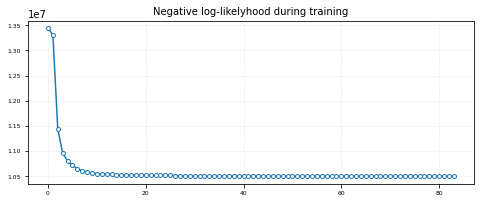

In [559]:
num_clusters = 10

model = EM_bernoulli_mix(num_clusters, x_train_)
model.fit()

plt.figure(figsize=(8, 3))
plt.plot(model.losses, marker='o', markersize=4, markerfacecolor='white')
plt.grid(ls=':', alpha=.4)
plt.xticks(size=6); plt.yticks(size=6);
plt.title('Negative log-likelyhood during training', fontsize=10);

In [560]:
predicted = model.predict_cluster(x_test_)

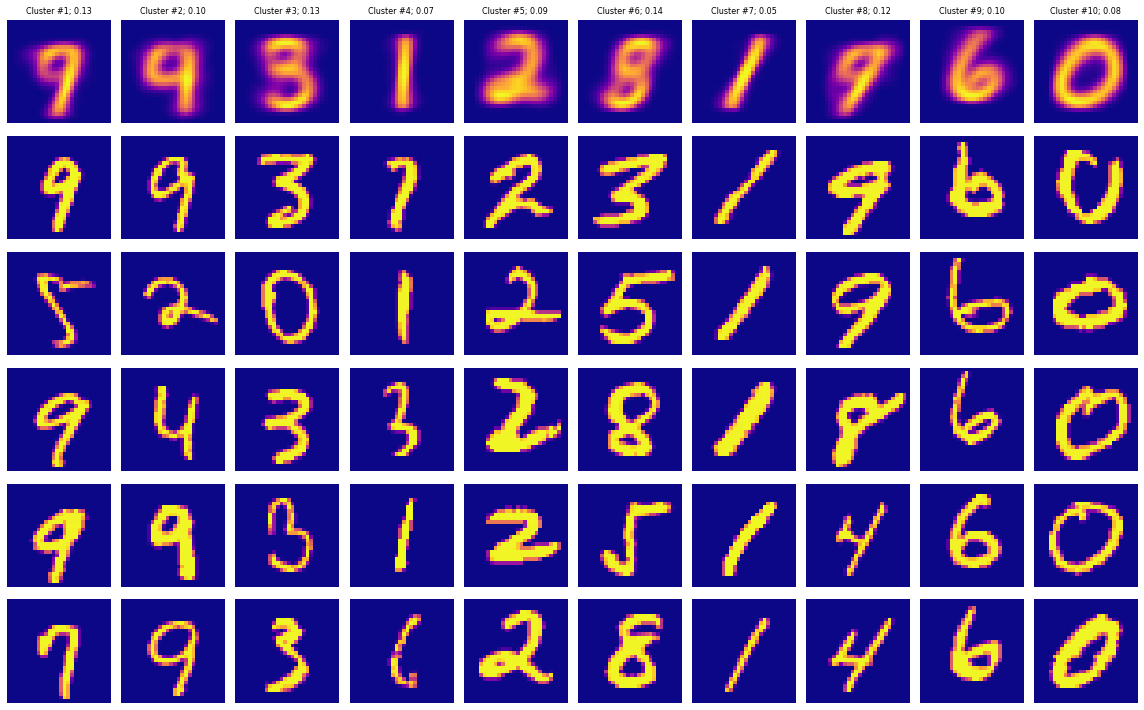

In [561]:
num_samples = 5

fig, axs = plt.subplots(num_samples+1, num_clusters, figsize=(16, 10))

for cluster, ax in enumerate(axs.T):
    
    ## main cluster picture:
    ax[0].imshow(model.probas[cluster].reshape(28, 28), cmap=plt.cm.plasma)
    ax[0].axis("off")
    ax[0].set_title(f"Cluster #{cluster+1}; {model.weights.ravel()[cluster]:.2f}", fontsize=8)
    
    ## samples from that cluster:
    pic_idx = random.sample(list(np.where(predicted == cluster)[0]), num_samples)
    for i, idx in enumerate(pic_idx):
        ax[i+1].imshow(x_test[idx], cmap=plt.cm.plasma)
        ax[i+1].axis("off")
        
fig.tight_layout()
plt.show()